In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('./src/train.csv', index_col="id")

In [3]:
train.keys()

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [4]:
train.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.50,Ideal,D,VS2,62.3,55.0,5.11,5.07,3.17,1845
1,1.54,Good,I,VS1,63.6,60.0,7.30,7.33,4.65,10164
2,1.32,Very Good,J,SI2,61.7,60.0,6.95,7.01,4.31,5513
3,1.20,Ideal,I,SI1,62.1,55.0,6.83,6.79,4.23,5174
4,1.73,Premium,I,SI1,61.2,60.0,7.67,7.65,4.69,10957


In [5]:
# We get the info from the dataset.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


In [6]:
# We check if there are any null values.
train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Handle Remaining Categorical Data & Convert to Ordinal

Now we print the dtypes of the data again. There are 3 categorical columns within the dataset: CUT, COLOR and CLARITY.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


In [8]:
# We will inspect the columns that are object type and see how they are distributed in case we need to clean them.

train.cut.value_counts()

Ideal        16152
Premium      10321
Very Good     9040
Good          3729
Fair          1213
Name: cut, dtype: int64

In [9]:
# As the "cut" column values are a range from Fair (worst) to Ideal (best) that affect the "price" column, we convert them into Integers-numerical values (1 to 5)
cut_dic = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4,'Ideal':5}

train.cut = train.cut.map(cut_dic) 

In [11]:
# We will inspect the columns that are object type and see how they are distributed in case we need to clean them.

train.color.value_counts()

G    8469
E    7282
F    7199
H    6210
D    5098
I    4091
J    2106
Name: color, dtype: int64

In [12]:
# As the "color" column values are also a range from J (worst) to D(best) that affect the "price" column, we convert them into Integers-numerical values (1 to 7)

color_dic = {'J':1, 'I':2, 'H':3, 'G':4,'F':5, 'E':6, 'D':7}

train.color = train.color.map(color_dic) 

In [13]:
# We will inspect the columns that are object type and see how they are distributed in case we need to clean them.

train.clarity.value_counts()

SI1     9758
VS2     9272
SI2     6895
VS1     6151
VVS2    3799
VVS1    2692
IF      1321
I1       567
Name: clarity, dtype: int64

In [14]:
# As the "clarity" column values are also a range from I1 (worst) to IF(best) that affect the "price" column, we convert them into Integers-numerical values (1 to 7)

clarity_dic = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4,'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

train.clarity = train.clarity.map(clarity_dic) 

In [15]:
train.corr()


,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.135198,-0.294212,-0.350039,0.026242,0.183268,0.975538,0.944843,0.967968,0.921776
cut,-0.135198,1.000000,0.025948,0.190523,-0.219215,-0.434853,-0.126384,-0.121461,-0.152219,-0.052246
color,-0.294212,0.025948,1.000000,-0.025203,-0.052073,-0.027061,-0.273145,-0.264365,-0.276464,-0.174569
clarity,-0.350039,0.190523,-0.025203,1.000000,-0.068171,-0.164441,-0.369195,-0.352933,-0.370560,-0.144279
depth,0.026242,-0.219215,-0.052073,-0.068171,1.000000,-0.296991,-0.026495,-0.030529,0.095624,-0.013715
table,0.183268,-0.434853,-0.027061,-0.164441,-0.296991,1.000000,0.197330,0.184213,0.156565,0.127199
x,0.975538,-0.126384,-0.273145,-0.369195,-0.026495,0.197330,1.000000,0.967690,0.985338,0.884862
y,0.944843,-0.121461,-0.264365,-0.352933,-0.030529,0.184213,0.967690,1.000000,0.960890,0.859062
z,0.967968,-0.152219,-0.276464,-0.370560,0.095624,0.156565,0.985338,0.960890,1.000000,0.873913
price,0.921776,-0.052246,-0.174569,-0.144279,-0.013715,0.127199,0.884862,0.859062,0.873913,1.000000


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

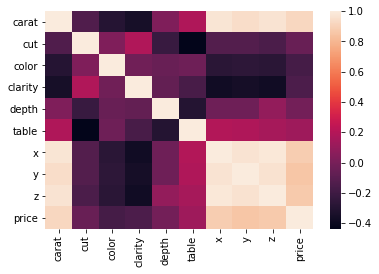

In [17]:

sns.heatmap(train.corr());

In [18]:
train.drop(columns=['y','z'], inplace=True)


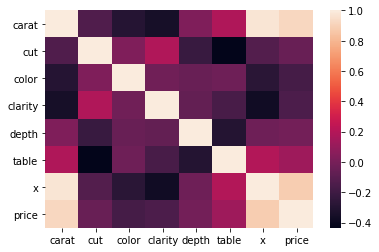

In [19]:
sns.heatmap(train.corr());

In [20]:
# Como podemos ver a continuación, hemos convertido todas las columnas a floats o integers.
# El siguiente paso será entrenar los modelos.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  int64  
 2   color    40455 non-null  int64  
 3   clarity  40455 non-null  int64  
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   price    40455 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 2.8 MB


In [22]:
train.to_csv('output/train_clean.csv')

In [23]:
# We will also clean and prepare the "predict" dataset for training the models.

In [24]:
predict = pd.read_csv('./src/predict.csv', index_col="id")

In [25]:
predict.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.45,Premium,E,SI1,62.8,58.0,4.88,4.84,3.05
1,1.23,Ideal,H,SI1,61.0,56.0,6.96,6.92,4.23
2,0.33,Ideal,I,IF,61.8,55.0,4.46,4.47,2.76
3,0.51,Premium,D,VS2,58.0,60.0,5.29,5.26,3.06
4,0.40,Premium,E,VS2,62.2,59.0,4.71,4.74,2.94


In [26]:
# As the "cut" column values are a range from Fair (worst) to Ideal (best), we convert them into Integers-numerical 
# values (1 to 5)
cut_dic = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4,'Ideal':5}

predict.cut = predict.cut.map(cut_dic) 

# As the "color" column values are also a range from J (worst) to D(best), we convert them into Integers-numerical 
# values (1 to 7)

color_dic = {'J':1, 'I':2, 'H':3, 'G':4,'F':5, 'E':6, 'D':7}

predict.color = predict.color.map(color_dic) 

# As the "clarity" column values are also a range from I1 (worst) to IF(best), we convert them into Integers-
# numerical values (1 to 7)

clarity_dic = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4,'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

predict.clarity = predict.clarity.map(clarity_dic) 

In [27]:
predict.drop(columns=['y','z'], inplace=True)


In [28]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13485 entries, 0 to 13484
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    13485 non-null  float64
 1   cut      13485 non-null  int64  
 2   color    13485 non-null  int64  
 3   clarity  13485 non-null  int64  
 4   depth    13485 non-null  float64
 5   table    13485 non-null  float64
 6   x        13485 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 842.8 KB


In [29]:
predict.to_csv('output/predict_clean.csv')